<a href="https://colab.research.google.com/github/mulcahrj/DATA6545_Final/blob/main/Final_Project_Data_Audit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Driven Bank Telemarking - Part 1: Data Audit Report**

## Executive Summary

In this project, we are going to be analyzing telemarking data collected from a Portuguese retail bank to understand what drivers will predict if a client will open a term deposit account.

Part 1 focuses on auditing the data that will be used for analysis throughout the project, and transforming it for use in machine learning models, which will be done in the next part.

In this data audit, we do the following things to understand the dataset and transform for later consumption:

*   **Data quality checks**: do the data make sense? Here we identify anything that later needs to be remediated before we work on analysis
*   **Checking expected values**: Does the data meet expectations for the domain? We need to see if the population of data make sense based on the definitions of each field
*   **Exploratory data analysis**: Boxplots galore - we use this to find outliers which will later be managed so we can model the data. We also look for any additional questions that may come up through visualizing the data
*   **Imputation**: dealing with NA values that arise, as the models will require values here to work properly
*   **Outlier Handling**: outliers can impact the effectiveness of a model; here we eliminate that risk
*   **Scaling**: scaling brings the data points closer together, reducing overall uncertainty for the models later on
*   **Standardization**: here we fit the data around the mean with a standard deviation of one, with the goal of bringin features to a common scale while maintaining the differences in ranges of values

## Data Dictionary 

| Field Name  |  Description | Type of Data | Example Values | 
|----------|-------------|------------|------------|
|**Bank Client Data**|
| Age | Person Age | Continuous | 17 - 98| 
| Job |  Type of Job | Catergorical |services,admin, etc| 
| Martial | Marital Status | Categorical|married, single, etc| 
| Education | Education Status | Categorical (Ordinal?) |basic.4y, high.school,university.degree, etc.| 
|Default| Has Credit in Default? |Categorical |yes,no,unknown,Nan | 
|Housing | Has Housing Loan? |Categorical |yes,no,unknown,Nan | 
|Loan|  Has Personal Loan? |Categorical |yes,no,unknown,Nan| 
|**Related with the Last Contact of the Current Campaign**|| 
|Contact|  Contact Communication Type |Categorical |telephone,nan,cellular| 
|Month| Last Contact Month of Year |Categorical|Jan - Dec| 
|day_of_week| Last Contact Day of the Week |Categorical|mon-fri,Nan| 
|Duration |  Last Contact Duration, in Seconds - **Data Dropped** |Continuous|0-4918| 
|Campaign| Number of Contacts Performed During this Campaign and for this Client |(Continuous?, includes last contact)|1-56| 
|pdays| Number of Days that Passed by After the Client was Last Contacted from a Previous Campaign; (999 means client was not previously contacted) |Continuous|0,1,2-999| 
|Previous| number of contacts performed before this campaign and for this client | Continuous|0-7| 
|Poutcome| Outcome of the Previous Marketing Campaign | Categorical |nonexistent nan failure success|
|**Socioeconomical Features (Portugal/Europe)**|
|emp.var.rate| Employment Variation Rate - Quarterly Indicator|Continuous|-3.4 - 1.4| 
|cons.price.idx| Consumer Price Index - Monthly Indicator | Continuous|92.2-94.77| 
|cons.conf.idx | Consumer Confidence Index - Monthly Indicator|Continuous|-50.8 - -26.9| 
|euribor3m| Euribor 3 Month Rolling Average - Daily Indicator |Continuous|0.63 - 5.04| 
|nr.employed|Number of Employees - Quarterly Indicator |Continuous|4963.6 - 5228.1| 
|**Additional Features**|
|total_assets|Total Assets Self Reported by the Customer in 1,000 Euros|Continuous| 10.85 - 360.4| 
|customer_ratings|Customer Rating of the Current Campaign |Categorical|1 - 5, Nan| 
|customer_language| Language Used by the Customer in the Current Campaign |Categorical|Portuguese, English, Spanish, Other, Nan| 
|rep_avg_rating| average rating of the representative prior to the current campaign |Continuous|2 - 5| 
|customer_length| Number of Months Customer Doing Business ith the Bank - Internal Records |Continuous|0 - 72| 
|other_banks| If the Customer is Doing Business with Other Banks - self-reported |Categorical|yes, no, unknown, Nan| 
|**Target**|
|y| Has the Client Subscribed a Term Deposit? |Binary|1,0| 



## Import Data

### Import Pandas

In [ ]:
import pandas as pd




### Import Data

In [ ]:
# Read Excel file and set up in
path = 'https://raw.githubusercontent.com/mulcahrj/DATA6545_Final/main/comp2_data.csv'

starting_data = pd.read_csv(path,index_col=0)

In [ ]:
# Check that data import is completed successfully

starting_data.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,cons.conf.idx,euribor3m,nr.employed,total_assets,customer_ratings,customer_language,rep_avg_rating,customer_length,other_banks,y
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,-36.4,4.857,5191.0,54.59,1.0,Portuguese,2.03,0.67,yes,no
1,57.0,services,married,high.school,unknown,no,no,telephone,may,mon,...,-36.4,4.857,5191.0,48.91,4.0,Portuguese,3.50,35.93,yes,no
2,37.0,services,married,high.school,no,yes,no,telephone,may,mon,...,-36.4,4.857,5191.0,NaN,3.0,English,2.34,8.16,yes,no
3,40.0,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,-36.4,4.857,5191.0,120.77,1.0,Portuguese,2.15,3.60,yes,no
4,56.0,services,married,high.school,no,no,yes,telephone,may,mon,...,-36.4,4.857,5191.0,61.12,5.0,Portuguese,4.06,49.35,yes,no
5,45.0,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,-36.4,4.857,5191.0,74.02,4.0,Portuguese,3.46,35.06,yes,no
6,59.0,admin.,NaN,professional.course,no,no,no,telephone,may,mon,...,-36.4,4.857,5191.0,61.58,5.0,NaN,4.69,64.63,no,no
7,41.0,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,NaN,4.857,5191.0,67.77,5.0,Portuguese,NaN,46.62,yes,no
8,24.0,technician,single,professional.course,no,yes,no,telephone,may,mon,...,-36.4,4.857,5191.0,63.40,5.0,Portuguese,4.69,64.58,no,no
9,25.0,services,single,high.school,no,yes,no,telephone,may,mon,...,-36.4,4.857,5191.0,63.51,5.0,Portuguese,4.16,51.92,yes,no


In [ ]:
starting_data.shape

(45307, 27)

### Data Quality Checks 

In [ ]:
# Check the data types of each column 

starting_data.dtypes

age                  float64
job                   object
marital               object
education             object
default               object
housing               object
loan                  object
contact               object
month                 object
day_of_week           object
duration             float64
campaign             float64
pdays                float64
previous             float64
poutcome              object
emp.var.rate         float64
cons.price.idx       float64
cons.conf.idx        float64
euribor3m            float64
nr.employed          float64
total_assets         float64
customer_ratings     float64
customer_language     object
rep_avg_rating       float64
customer_length      float64
other_banks           object
y                     object
dtype: object

In [ ]:
# almost all fields have nulls that need to be dealt with
# identify quantity of missing values in each column 

starting_data.isnull().sum(axis = 0)

age                    22
job                   173
marital              1187
education            1675
default              1793
housing               205
loan                  640
contact              1822
month                2186
day_of_week          1417
duration             1121
campaign             2035
pdays                 597
previous                4
poutcome             1704
emp.var.rate          857
cons.price.idx       1051
cons.conf.idx        2046
euribor3m            1551
nr.employed          1326
total_assets          937
customer_ratings     1775
customer_language    1158
rep_avg_rating       2186
customer_length       694
other_banks           350
y                       0
dtype: int64

In [ ]:
# Making the missing data into a percentage of the total data

starting_data.isnull().mean().round(4)*100

age                  0.05
job                  0.38
marital              2.62
education            3.70
default              3.96
housing              0.45
loan                 1.41
contact              4.02
month                4.82
day_of_week          3.13
duration             2.47
campaign             4.49
pdays                1.32
previous             0.01
poutcome             3.76
emp.var.rate         1.89
cons.price.idx       2.32
cons.conf.idx        4.52
euribor3m            3.42
nr.employed          2.93
total_assets         2.07
customer_ratings     3.92
customer_language    2.56
rep_avg_rating       4.82
customer_length      1.53
other_banks          0.77
y                    0.00
dtype: float64

### Check Expected Values


In [ ]:
# transpose the dataset description to easily view all columns 

starting_data.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,45285.0,NaN,NaN,NaN,40.032638,10.411454,17.0,32.0,38.0,47.0,98.0
job,45134,12,admin.,11389,NaN,NaN,NaN,NaN,NaN,NaN,NaN
marital,44120,4,married,26768,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,43632,8,university.degree,12968,NaN,NaN,NaN,NaN,NaN,NaN,NaN
default,43514,3,no,34489,NaN,NaN,NaN,NaN,NaN,NaN,NaN
housing,45102,3,yes,23631,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan,44667,3,no,36763,NaN,NaN,NaN,NaN,NaN,NaN,NaN
contact,43485,2,cellular,27642,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month,43121,10,may,14402,NaN,NaN,NaN,NaN,NaN,NaN,NaN
day_of_week,43890,5,thu,9211,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Check the data values in each row against expected values  

for i in list(starting_data.columns):
  print("\n\n", i ,": \n",starting_data[i].unique())

# Everything seems to match correctly 

# use value counts 
# move this to later



 age : 
 [56. 57. 37. 40. 45. 59. 41. 24. 25. 29. 35. 54. 46. 50. 39. 30. 55. 49.
 34. 52. 58. 32. 38. 44. 42. 60. 53. 47. 51. 48. 33. 31. 43. 36. 28. 27.
 26. 22. 23. 20. 21. nan 61. 19. 18. 70. 66. 76. 67. 73. 88. 95. 77. 68.
 75. 63. 80. 62. 65. 72. 82. 64. 71. 69. 78. 85. 79. 83. 81. 74. 17. 87.
 91. 86. 98. 94. 84. 92. 89.]


 job : 
 ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student' nan]


 marital : 
 ['married' nan 'single' 'divorced' 'unknown']


 education : 
 ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' nan 'illiterate']


 default : 
 ['no' 'unknown' nan 'yes']


 housing : 
 ['no' 'yes' 'unknown' nan]


 loan : 
 ['no' 'yes' 'unknown' nan]


 contact : 
 ['telephone' nan 'cellular']


 month : 
 ['may' nan 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']


 day_of_week : 
 ['mon' nan 'tue' 'wed' 'thu' 'fri']


 d

## EDA

Exploratory Data Analysis - here we will find any additional questions that pop up with the data where we will either note it for later analysis, or look into it further.


### Import Packages


In [ ]:
import matplotlib.pyplot as plt

### Box Plotting

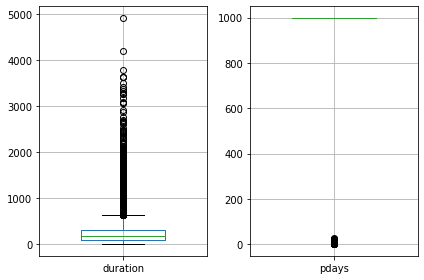

In [ ]:
fig, axes = plt.subplots(1,2) # create figure and axes

df = starting_data[['duration','pdays']]

for i,c in enumerate(list(df.columns.values)):  #if chart labels in last column @ df: (list(df.columns.values)[:-1])
    a = df.boxplot(c, ax=axes.flatten()[i], widths=0.5)

#fig.delaxes(axes[1,2]) # remove empty subplot
plt.tight_layout() 

plt.show()

 - **pdays** has an odd attribute where if the customer was not previously contacted, they were given a value of 999
 - we see in the boxplot that most customers were not contacted before
 - in feature engineering, we will transform pdays into a binary feature and group all customers who were contacted previously together, and those who had not been contacted previously in another group

 - For **duration**, we will discard this as it's too correlated to target **y** (per instruction)

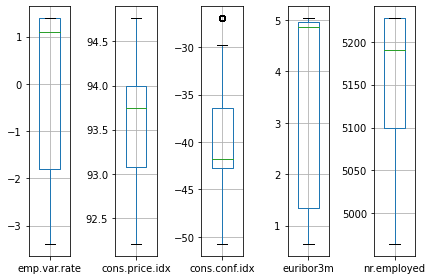

In [ ]:
fig, axes = plt.subplots(1,5) # create figure and axes

df = starting_data[['emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']]

for i,c in enumerate(list(df.columns.values)):  #if chart labels in last column @ df: (list(df.columns.values)[:-1])
    a = df.boxplot(c, ax=axes.flatten()[i], widths=0.5)

#fig.delaxes(axes[1,2]) # remove empty subplot
plt.tight_layout() 

plt.show()



- **emp.var.rate**, **euribor3m** and **nr.employed** are pretty heavily skewed, we will address these later and normalize the distribution
- **cons.price.index** and **cons.conf.idx** look pretty good, though **cons.conf.idx** is a bit skewed with a mean in the lower end of the range. We will keep an eye on it after outlier handling to see if this changes.

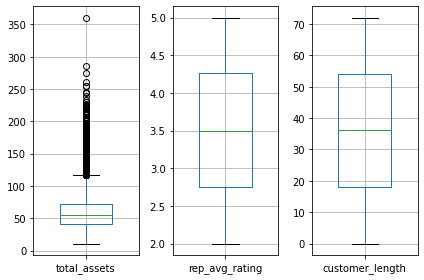

In [ ]:
fig, axes = plt.subplots(1,3) # create figure and axes

df = starting_data[['total_assets','rep_avg_rating','customer_length']]

for i,c in enumerate(list(df.columns.values)):  #if chart labels in last column @ df: (list(df.columns.values)[:-1])
    a = df.boxplot(c, ax=axes.flatten()[i],widths=0.5)

#fig.delaxes(axes[1,2]) # remove empty subplot
plt.tight_layout() 

plt.show()

- **total_assets** has a very large group of upper range outliers, which we will look at again once the data is imputed
- **rep_avg_rating** and **customer_length** look perfectly distributed..odd they would appear this way naturally but it is what we are looking for later on

### Bar Graphs for Catergorical Data

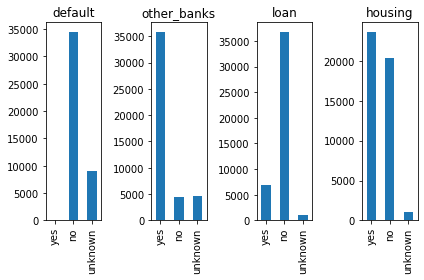

In [ ]:
df = starting_data

c = ['default','other_banks','loan', 'housing']

fig, ax = plt.subplots(1, 4)

order = ['yes','no','unknown']

for i, c in enumerate(df[c]):
    df[c].value_counts().loc[order].plot(kind="bar", ax=ax[i]).set_title(c)
fig.tight_layout()
fig.show()

- Default doesn't add any value since there are no 'yes' values, we will drop this field

In [ ]:
starting_data['day_of_week'].value_counts()

thu    9211
mon    9095
tue    8645
wed    8612
fri    8327
Name: day_of_week, dtype: int64

## Split Test & Train Data

### Import Packages

In [ ]:
from sklearn.model_selection import train_test_split

### Split Target from Features

In [ ]:
# seperate target dataframe from starting_data dataframe

target_data = starting_data['y']

target_data = pd.DataFrame(target_data)
target_data.head()

,y
0,no
1,no
2,no
3,no
4,no


In [ ]:
# seperate dataframe for feature columns 

features_data = starting_data.drop(columns = 'y')
features_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,total_assets,customer_ratings,customer_language,rep_avg_rating,customer_length,other_banks
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,NaN,-36.4,4.857,5191.0,54.59,1.0,Portuguese,2.03,0.67,yes
1,57.0,services,married,high.school,unknown,no,no,telephone,may,mon,...,93.994,-36.4,4.857,5191.0,48.91,4.0,Portuguese,3.50,35.93,yes
2,37.0,services,married,high.school,no,yes,no,telephone,may,mon,...,93.994,-36.4,4.857,5191.0,NaN,3.0,English,2.34,8.16,yes
3,40.0,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,93.994,-36.4,4.857,5191.0,120.77,1.0,Portuguese,2.15,3.60,yes
4,56.0,services,married,high.school,no,no,yes,telephone,may,mon,...,93.994,-36.4,4.857,5191.0,61.12,5.0,Portuguese,4.06,49.35,yes


### Feature Engineering (before split)

In [ ]:
def cust_ind(x, y):
  if x - y > 0:
    return 1
  else:
    return 0

In [ ]:
features_data['cust_exp_ind'] = features_data.apply(lambda x: cust_ind(x['customer_ratings'], x['rep_avg_rating']), axis=1)

In [ ]:
features_data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,total_assets,customer_ratings,rep_avg_rating,customer_length,cust_exp_ind
count,45285.000000,44186.000000,43272.000000,44710.000000,45303.000000,44450.000000,44256.000000,43261.000000,43756.000000,43981.000000,44370.000000,43532.000000,43121.000000,44613.000000,45307.000000
mean,40.032638,257.819219,2.568474,962.486916,0.174536,0.080745,93.576031,-40.500828,3.625198,5166.968573,59.273422,3.945075,3.499567,36.016727,0.819586
std,10.411454,258.448503,2.768319,186.884419,0.499369,1.571183,0.578899,4.624169,1.732650,72.332968,24.788508,1.125202,0.869430,20.872987,0.384536
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,10.850000,1.000000,2.000000,0.000000,0.000000
25%,32.000000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,41.860000,3.000000,2.750000,18.030000,1.000000
50%,38.000000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,54.730000,4.000000,3.500000,36.060000,1.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,71.670000,5.000000,4.260000,54.190000,1.000000
max,98.000000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,360.400000,5.000000,5.000000,72.000000,1.000000


### Split Test & Training Data

In [ ]:
# split features into test and train data 

X_train,X_test,y_train,y_test = train_test_split(features_data, target_data,test_size=.25,random_state=2021)

## Imputation


### Sample Checks

In [ ]:
# Splitting the columns into continuous and categorical features manually

cat_cols = ['age','job','marital','education','housing','loan','contact','month','day_of_week','poutcome','customer_ratings','customer_language','other_banks','cust_exp_ind']
cont_cols = ['duration','campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed','total_assets','rep_avg_rating','customer_length']

In [ ]:
# check the median for all continous columns
# verify each column has a median 
# verify the median makes sense 

#can zip instead of loop

print('X_train Medians:')

for i in cont_cols:
  j = X_train[i].median()
  print(i ,":", j)

# put X_test on a seperated line 
print('\n')

print('X_test Medians:')
for i in cont_cols:
  j = X_test[i].median()
  print(i ,":", j)

X_train Medians:
duration : 179.0
campaign : 2.0
pdays : 999.0
previous : 0.0
emp.var.rate : 1.1
cons.price.idx : 93.749
cons.conf.idx : -41.8
euribor3m : 4.857
nr.employed : 5191.0
total_assets : 54.7
rep_avg_rating : 3.5
customer_length : 36.095


X_test Medians:
duration : 181.0
campaign : 2.0
pdays : 999.0
previous : 0.0
emp.var.rate : 1.1
cons.price.idx : 93.444
cons.conf.idx : -41.8
euribor3m : 4.857
nr.employed : 5191.0
total_assets : 54.82
rep_avg_rating : 3.5
customer_length : 35.99


In [ ]:
# check the mode for all continous columns
# verify each column has a mode
# verify the mode makes sense

print('X_train Modes:')
for i in cat_cols:
  j = X_train[i].mode().iloc[0]
  print(i ,":", j)

# put X_test on a seperated line 
print('\n')


print('X_test Modes:')
for i in cat_cols:
  j = X_test[i].mode().iloc[0]
  print(i ,":", j)

X_train Modes:
age : 31.0
job : admin.
marital : married
education : university.degree
housing : yes
loan : no
contact : cellular
month : may
day_of_week : thu
poutcome : nonexistent
customer_ratings : 5.0
customer_language : Portuguese
other_banks : yes
cust_exp_ind : 1


X_test Modes:
age : 31.0
job : admin.
marital : married
education : university.degree
housing : yes
loan : no
contact : cellular
month : may
day_of_week : mon
poutcome : nonexistent
customer_ratings : 5.0
customer_language : Portuguese
other_banks : yes
cust_exp_ind : 1


### Split into 4 DFs

In [ ]:
# create new dataframes 

X_train_cat_imputed = pd.DataFrame()
X_train_cont_imputed = pd.DataFrame()
X_test_cat_imputed = pd.DataFrame()
X_test_cont_imputed = pd.DataFrame()

In [ ]:
features_data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45285.0,40.032638,10.411454,17.000,32.000,38.000,47.000,98.000
duration,44186.0,257.819219,258.448503,0.000,102.000,180.000,319.000,4918.000
campaign,43272.0,2.568474,2.768319,1.000,1.000,2.000,3.000,56.000
pdays,44710.0,962.486916,186.884419,0.000,999.000,999.000,999.000,999.000
previous,45303.0,0.174536,0.499369,0.000,0.000,0.000,0.000,7.000
emp.var.rate,44450.0,0.080745,1.571183,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,44256.0,93.576031,0.578899,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,43261.0,-40.500828,4.624169,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,43756.0,3.625198,1.732650,0.634,1.344,4.857,4.961,5.045
nr.employed,43981.0,5166.968573,72.332968,4963.600,5099.100,5191.000,5228.100,5228.100


In [ ]:
# X_train cat dataframe

X_train_cat = X_train[cat_cols]

In [ ]:
# X_train cont. dataframe

X_train_cont = X_train[cont_cols]

In [ ]:
# X_test cat dataframe

X_test_cat = X_test[cat_cols]

In [ ]:
# X_test cont. dataframe

X_test_cont = X_test[cont_cols]

### Impute the Data

In [ ]:
# Categorical filled with Mode
for i in X_train_cat.columns:
  X_train_cat_imputed[i] = X_train_cat[i].fillna(X_train_cat[i].mode().iloc[0]) 


In [ ]:
# Continous filled with median 
for i in X_train_cont.columns:
  X_train_cont_imputed[i]=X_train_cont[i].fillna(X_train_cont[i].median())

In [ ]:
# Categorical filled with Mode
for i in X_test_cat.columns:
  X_test_cat_imputed[i] = X_test_cat[i].fillna(X_test_cat[i].mode().iloc[0])

In [ ]:
# Continous filled with median 
for i in X_test_cont.columns:
  X_test_cont_imputed[i]=X_test_cont[i].fillna(X_test_cont[i].median())

### Verify Imputation

In [ ]:
# verify all the data is carried to the new dataframe

X_train_cat_imputed.head()

# 33,980 rows , 28 columnss

,age,job,marital,education,housing,loan,contact,month,day_of_week,poutcome,customer_ratings,customer_language,other_banks,cust_exp_ind
16190,41.0,blue-collar,married,unknown,yes,yes,cellular,jul,tue,nonexistent,5.0,Portuguese,yes,1
34332,33.0,blue-collar,married,basic.9y,yes,no,telephone,may,thu,nonexistent,3.0,Portuguese,yes,1
23806,31.0,self-employed,married,university.degree,yes,no,cellular,aug,fri,nonexistent,5.0,English,unknown,1
3688,53.0,blue-collar,married,basic.6y,yes,no,telephone,may,thu,nonexistent,3.0,English,yes,1
17869,46.0,technician,single,professional.course,no,no,cellular,jul,tue,nonexistent,3.0,Portuguese,yes,1


In [ ]:
# verify all the data is carried to the new dataframe

X_test_cat_imputed

# 11,327 rows , 28 columnss

,age,job,marital,education,housing,loan,contact,month,day_of_week,poutcome,customer_ratings,customer_language,other_banks,cust_exp_ind
23878,33.0,technician,single,professional.course,yes,no,cellular,aug,fri,nonexistent,4.0,Portuguese,yes,1
30243,36.0,technician,married,professional.course,yes,yes,cellular,apr,thu,success,5.0,Portuguese,no,1
13770,37.0,self-employed,married,basic.9y,yes,yes,cellular,jul,thu,nonexistent,5.0,Portuguese,yes,1
24556,55.0,services,married,university.degree,yes,no,cellular,nov,mon,nonexistent,3.0,Portuguese,yes,1
17495,40.0,blue-collar,married,university.degree,yes,no,cellular,jul,mon,nonexistent,1.0,Portuguese,yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20743,32.0,technician,married,university.degree,yes,yes,cellular,aug,mon,nonexistent,5.0,Portuguese,unknown,1
19823,44.0,admin.,single,university.degree,no,no,cellular,aug,fri,nonexistent,5.0,Portuguese,no,1
41610,36.0,technician,married,professional.course,unknown,unknown,telephone,may,tue,nonexistent,4.0,English,yes,1
35645,40.0,admin.,single,high.school,yes,no,cellular,may,mon,nonexistent,1.0,Portuguese,yes,0


In [ ]:
# verify that the data types are still the same

print('X_train Data Types:')
X_train_cat_imputed.dtypes

X_train Data Types:


age                  float64
job                   object
marital               object
education             object
housing               object
loan                  object
contact               object
month                 object
day_of_week           object
poutcome              object
customer_ratings     float64
customer_language     object
other_banks           object
cust_exp_ind           int64
dtype: object

In [ ]:
# verify that the data types are still the same

print('X_train Data Types:')
X_train_cont_imputed.dtypes

X_train Data Types:


duration           float64
campaign           float64
pdays              float64
previous           float64
emp.var.rate       float64
cons.price.idx     float64
cons.conf.idx      float64
euribor3m          float64
nr.employed        float64
total_assets       float64
rep_avg_rating     float64
customer_length    float64
dtype: object

In [ ]:
# verify there are no more NA values

X_train_cat_imputed.isna().any()

age                  False
job                  False
marital              False
education            False
housing              False
loan                 False
contact              False
month                False
day_of_week          False
poutcome             False
customer_ratings     False
customer_language    False
other_banks          False
cust_exp_ind         False
dtype: bool

In [ ]:
# verify there are no more NA values

X_train_cont_imputed.isna().any()

duration           False
campaign           False
pdays              False
previous           False
emp.var.rate       False
cons.price.idx     False
cons.conf.idx      False
euribor3m          False
nr.employed        False
total_assets       False
rep_avg_rating     False
customer_length    False
dtype: bool

In [ ]:
# does not hurt to double check that there are no nulls

X_test_cat_imputed.isnull().any()

age                  False
job                  False
marital              False
education            False
housing              False
loan                 False
contact              False
month                False
day_of_week          False
poutcome             False
customer_ratings     False
customer_language    False
other_banks          False
cust_exp_ind         False
dtype: bool

In [ ]:
# does not hurt to double check that there are no nulls

X_test_cont_imputed.isnull().any()

duration           False
campaign           False
pdays              False
previous           False
emp.var.rate       False
cons.price.idx     False
cons.conf.idx      False
euribor3m          False
nr.employed        False
total_assets       False
rep_avg_rating     False
customer_length    False
dtype: bool

### Check Expected Values

In [ ]:
# triple check all values in columns are that they are what is expected

for i in list(X_test_cat_imputed.columns):
  print("\n\n", i ,": \n",X_test_cat_imputed[i].unique())

# Everything seems to match correctly 

# use assert



 age : 
 [33. 36. 37. 55. 40. 29. 57. 44. 39. 31. 18. 80. 34. 24. 26. 56. 25. 47.
 48. 32. 63. 59. 30. 38. 52. 49. 45. 42. 73. 43. 35. 28. 54. 41. 84. 27.
 66. 51. 53. 50. 46. 58. 21. 22. 74. 76. 60. 23. 71. 62. 69. 19. 78. 82.
 98. 20. 61. 68. 85. 75. 79. 88. 64. 72. 70. 92. 81. 77. 86. 65. 83. 91.
 67. 89. 17. 87.]


 job : 
 ['technician' 'self-employed' 'services' 'blue-collar' 'retired' 'admin.'
 'student' 'unemployed' 'housemaid' 'management' 'entrepreneur' 'unknown']


 marital : 
 ['single' 'married' 'divorced' 'unknown']


 education : 
 ['professional.course' 'basic.9y' 'university.degree' 'basic.4y'
 'high.school' 'unknown' 'basic.6y' 'illiterate']


 housing : 
 ['yes' 'no' 'unknown']


 loan : 
 ['no' 'yes' 'unknown']


 contact : 
 ['cellular' 'telephone']


 month : 
 ['aug' 'apr' 'jul' 'nov' 'may' 'mar' 'jun' 'sep' 'oct' 'dec']


 day_of_week : 
 ['fri' 'thu' 'mon' 'tue' 'wed']


 poutcome : 
 ['nonexistent' 'success' 'failure']


 customer_ratings : 
 [4. 5. 3. 1. 2.

In [ ]:
# transpose data to view general information 

#mode/unique - value.counts

X_train_cat_imputed.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,33980.0,NaN,NaN,NaN,39.969453,10.370389,17.0,32.0,38.0,47.0,98.0
job,33980,12,admin.,8637,NaN,NaN,NaN,NaN,NaN,NaN,NaN
marital,33980,4,married,20900,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,33980,8,university.degree,10960,NaN,NaN,NaN,NaN,NaN,NaN,NaN
housing,33980,3,yes,17909,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan,33980,3,no,28060,NaN,NaN,NaN,NaN,NaN,NaN,NaN
contact,33980,2,cellular,22100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month,33980,10,may,12432,NaN,NaN,NaN,NaN,NaN,NaN,NaN
day_of_week,33980,5,thu,8048,NaN,NaN,NaN,NaN,NaN,NaN,NaN
poutcome,33980,3,nonexistent,29513,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Notes:

Do not describe for categorical features, only continous 

In [ ]:
# transpose data to view general information 

X_test_cat_imputed.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,11327.0,NaN,NaN,NaN,40.204644,10.5297,17.0,32.0,38.0,47.0,98.0
job,11327,12,admin.,2925,NaN,NaN,NaN,NaN,NaN,NaN,NaN
marital,11327,4,married,7055,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,11327,8,university.degree,3683,NaN,NaN,NaN,NaN,NaN,NaN,NaN
housing,11327,3,yes,5927,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan,11327,3,no,9343,NaN,NaN,NaN,NaN,NaN,NaN,NaN
contact,11327,2,cellular,7364,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month,11327,10,may,4156,NaN,NaN,NaN,NaN,NaN,NaN,NaN
day_of_week,11327,5,mon,2628,NaN,NaN,NaN,NaN,NaN,NaN,NaN
poutcome,11327,3,nonexistent,9821,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Feature Engineering

In [ ]:
# make binning function to make pdays binary
def label_pdays(col):
    if (col == 999):
        return (0) 
    else:
        return (1)

In [ ]:
# apply binning function to pdays

X_test_cont_imputed['pdays_bin'] = X_test_cont_imputed['pdays'].apply(label_pdays)

In [ ]:
# check that binning has worked correctly for pdays
X_test_cont_imputed[['pdays','pdays_bin']].head()

,pdays,pdays_bin
23878,999.0,0
30243,2.0,1
13770,999.0,0
24556,999.0,0
17495,999.0,0


In [ ]:
X_train_cont_imputed['pdays_bin'] = X_train_cont_imputed['pdays'].apply(label_pdays)

In [ ]:
# check that binning has worked correctly for pdays
X_train_cont_imputed[['pdays','pdays_bin']].head()

,pdays,pdays_bin
16190,999.0,0
34332,999.0,0
23806,999.0,0
3688,999.0,0
17869,999.0,0


In [ ]:
X_train_cat_imputed.isna().sum()

age                  0
job                  0
marital              0
education            0
housing              0
loan                 0
contact              0
month                0
day_of_week          0
poutcome             0
customer_ratings     0
customer_language    0
other_banks          0
cust_exp_ind         0
dtype: int64

## One Hot Encoding

Here we split the different types of features by category for further processing. We split the data by the following groups:

*   Continuous Features
*   Categorical Features
*   Target


### Binning for OHE

Functions for binning categorical features with more than 5 distinct values

In [ ]:
# label encoder

def label_target(col):
    if col in ['yes']:
        return 1
    else:
        return 0

In [ ]:
# Binning job into 5 categories 'blue-collar','white-collar','services','other' and 'unknown'

# unknown own category - should we make assumptions? missing? impute @ mmode after bin?

def label_job(col):
    if col in ['blue-collar', 'technician']:
        return 'blue-collar'
    elif col in ['admin.','managment']:
        return 'white-collar'
    elif col in ['services','housemade']:
        return 'services'
    elif col in ['retired','entrepreneur','self-employed','unemployed','student']:
        return 'other'
    else:
        return 'unknown' # survey q - no answer

In [ ]:
# Function to bin months into quarters 'Q1','Q2','Q3', and 'Q4'

# value.counts for each month - check q1

def label_qtr(col):
    if col in ['jan', 'feb', 'mar']:
        return 'Q1'
    elif col in ['apr', 'may', 'jun']:
        return 'Q2'
    elif col in ['jul', 'aug', 'sep']:
        return 'Q3'
    else:
        return 'Q4'

In [ ]:
# Binning education into 5 categories  'unknown', 'illterate', 'pre-highschool', 'high school' and 'post high-school'

def label_edu(col):
    if col in ['illiterate']:
        return 'illiterate'    
    elif col in ['unknown']:
        return 'unknown'
    elif col in ['basic.4y','basic.6y','basic.9y']:
        return 'pre high-school'
    elif col in ['high.school']:
        return 'high-school'
    else:
        return 'post high-school' #higher ed

In [ ]:
# Binning ages into 5 groups as a categorical feature

# spell out why we picked these bins
# could be bin @ equal distribution
# do value.counts to see balance

def label_age(col):
    if (col < 26):
        return '25 or younger'
    if (col >= 26) & (col <= 35): 
        return '26 to 35'
    if (col >= 36) & (col <= 45):
        return '36 to 45'
    if (col >= 46) & (col <= 55):
        return '46 to 55'
    if (col >= 56):
        return '56+'


In [ ]:
X_test_cat_imputed.head()

,age,job,marital,education,housing,loan,contact,month,day_of_week,poutcome,customer_ratings,customer_language,other_banks,cust_exp_ind
23878,33.0,technician,single,professional.course,yes,no,cellular,aug,fri,nonexistent,4.0,Portuguese,yes,1
30243,36.0,technician,married,professional.course,yes,yes,cellular,apr,thu,success,5.0,Portuguese,no,1
13770,37.0,self-employed,married,basic.9y,yes,yes,cellular,jul,thu,nonexistent,5.0,Portuguese,yes,1
24556,55.0,services,married,university.degree,yes,no,cellular,nov,mon,nonexistent,3.0,Portuguese,yes,1
17495,40.0,blue-collar,married,university.degree,yes,no,cellular,jul,mon,nonexistent,1.0,Portuguese,yes,0


Executing bin functions for X_test

In [ ]:
X_test_cat_imputed['education_bin'] = X_test_cat_imputed['education'].apply(label_edu)

In [ ]:
X_test_cat_imputed['qtr_bin'] = X_test_cat_imputed['month'].apply(label_qtr)

In [ ]:
X_test_cat_imputed['job_bin'] = X_test_cat_imputed['job'].apply(label_job)

In [ ]:
X_test_cat_imputed['age_bin'] = X_test_cat_imputed['age'].apply(label_age)

Checking that the binning functions worked properly

In [ ]:
X_test_cat_imputed[['education','education_bin','month','qtr_bin','job','job_bin','age_bin','age']].head()

,education,education_bin,month,qtr_bin,job,job_bin,age_bin,age
23878,professional.course,post high-school,aug,Q3,technician,blue-collar,26 to 35,33.0
30243,professional.course,post high-school,apr,Q2,technician,blue-collar,36 to 45,36.0
13770,basic.9y,pre high-school,jul,Q3,self-employed,other,36 to 45,37.0
24556,university.degree,post high-school,nov,Q4,services,services,46 to 55,55.0
17495,university.degree,post high-school,jul,Q3,blue-collar,blue-collar,36 to 45,40.0


Execute bin functions for X_train

In [ ]:
X_train_cat_imputed['education_bin'] = X_train_cat_imputed['education'].apply(label_edu)

In [ ]:
X_train_cat_imputed['qtr_bin'] = X_train_cat_imputed['month'].apply(label_qtr)

In [ ]:
X_train_cat_imputed['job_bin'] = X_train_cat_imputed['job'].apply(label_job)

In [ ]:
X_train_cat_imputed['age_bin'] = X_train_cat_imputed['age'].apply(label_age)

Again, verifying the bin functions working, this time for X_train

In [ ]:
X_train_cat_imputed[['education','education_bin','month','qtr_bin','job','job_bin','age_bin','age']].head()

,education,education_bin,month,qtr_bin,job,job_bin,age_bin,age
16190,unknown,unknown,jul,Q3,blue-collar,blue-collar,36 to 45,41.0
34332,basic.9y,pre high-school,may,Q2,blue-collar,blue-collar,26 to 35,33.0
23806,university.degree,post high-school,aug,Q3,self-employed,other,26 to 35,31.0
3688,basic.6y,pre high-school,may,Q2,blue-collar,blue-collar,46 to 55,53.0
17869,professional.course,post high-school,jul,Q3,technician,blue-collar,46 to 55,46.0


Execute bin for y_train,y_test

In [ ]:
y_test['y_bin'] = y_test['y'].apply(label_target)

In [ ]:
y_train['y_bin'] = y_train['y'].apply(label_target)

In [ ]:
y_test.head()

,y,y_bin
23878,no,0
30243,yes,1
13770,no,0
24556,no,0
17495,no,0


In [ ]:
y_test.value_counts()

y    y_bin
no   0        10020
yes  1         1307
dtype: int64

In [ ]:
y_train.head()

,y,y_bin
16190,no,0
34332,no,0
23806,no,0
3688,no,0
17869,no,0


In [ ]:
y_train.value_counts()

y    y_bin
no   0        30196
yes  1         3784
dtype: int64

### One Hot Encode

In [ ]:
X_train_cat_imputed.columns.values

array(['age', 'job', 'marital', 'education', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'customer_ratings',
       'customer_language', 'other_banks', 'cust_exp_ind',
       'education_bin', 'qtr_bin', 'job_bin', 'age_bin'], dtype=object)

Now that we've binned education, job, month and age, we need to drop them to prevent oversaturating OHE columns

In [ ]:
X_train_cat_imputed.drop(['education','job','month','age'], axis=1, inplace=True)

In [ ]:
X_train_cat_imputed.columns.values

array(['marital', 'housing', 'loan', 'contact', 'day_of_week', 'poutcome',
       'customer_ratings', 'customer_language', 'other_banks',
       'cust_exp_ind', 'education_bin', 'qtr_bin', 'job_bin', 'age_bin'],
      dtype=object)

Columns dropped from X_train categorical df, now we do the same to X_test

In [ ]:
X_test_cat_imputed.columns.values

array(['age', 'job', 'marital', 'education', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'customer_ratings',
       'customer_language', 'other_banks', 'cust_exp_ind',
       'education_bin', 'qtr_bin', 'job_bin', 'age_bin'], dtype=object)

In [ ]:
X_test_cat_imputed.drop(['education','job','month','age'], axis=1, inplace=True)

In [ ]:
X_test_cat_imputed.columns.values

array(['marital', 'housing', 'loan', 'contact', 'day_of_week', 'poutcome',
       'customer_ratings', 'customer_language', 'other_banks',
       'cust_exp_ind', 'education_bin', 'qtr_bin', 'job_bin', 'age_bin'],
      dtype=object)

In [ ]:
# add assertion to make sure remaining columns match

Now with the original binned columns dropped, we can continue with One Hot Encoding categorical features for both X_train and X_test

In [ ]:
print(X_train_cat_imputed.shape)
print(X_test_cat_imputed.shape)

(33980, 14)
(11327, 14)


In [ ]:
ohe_X_train_cat = pd.get_dummies(X_train_cat_imputed)
ohe_X_test_cat = pd.get_dummies(X_test_cat_imputed)

In [ ]:
print(ohe_X_train_cat.shape)
print(ohe_X_test_cat.shape)


(33980, 48)
(11327, 48)


In [ ]:
ohe_X_train_cat.isna().any()

customer_ratings                  False
cust_exp_ind                      False
marital_divorced                  False
marital_married                   False
marital_single                    False
marital_unknown                   False
housing_no                        False
housing_unknown                   False
housing_yes                       False
loan_no                           False
loan_unknown                      False
loan_yes                          False
contact_cellular                  False
contact_telephone                 False
day_of_week_fri                   False
day_of_week_mon                   False
day_of_week_thu                   False
day_of_week_tue                   False
day_of_week_wed                   False
poutcome_failure                  False
poutcome_nonexistent              False
poutcome_success                  False
customer_language_English         False
customer_language_Other           False
customer_language_Portuguese      False


We end up with 50 columns instead of 14, which looks right. let's check the df.head() to verify the OHE worked

In [ ]:
ohe_X_train_cat.head()

,customer_ratings,cust_exp_ind,marital_divorced,marital_married,marital_single,marital_unknown,housing_no,housing_unknown,housing_yes,loan_no,...,job_bin_blue-collar,job_bin_other,job_bin_services,job_bin_unknown,job_bin_white-collar,age_bin_25 or younger,age_bin_26 to 35,age_bin_36 to 45,age_bin_46 to 55,age_bin_56+
16190,5.0,1,0,1,0,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
34332,3.0,1,0,1,0,0,0,0,1,1,...,1,0,0,0,0,0,1,0,0,0
23806,5.0,1,0,1,0,0,0,0,1,1,...,0,1,0,0,0,0,1,0,0,0
3688,3.0,1,0,1,0,0,0,0,1,1,...,1,0,0,0,0,0,0,0,1,0
17869,3.0,1,0,0,1,0,1,0,0,1,...,1,0,0,0,0,0,0,0,1,0


## Outlier Handling, Scaling, and Normalization 

### Import Packages

In this section, we define each of the methods we will be using to manage outliers, scale the data, and standardize the distribution curve. We will use these functions to later tweak the data pipeline, which will help us yield the best results later on.

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler
from scipy import stats as stats


In [ ]:
X_test_cat = ohe_X_test_cat
X_train_cat = ohe_X_train_cat
X_train_con = X_train_cont_imputed
X_test_con = X_test_cont_imputed

In [ ]:
X_train_con.isna().any()

duration           False
campaign           False
pdays              False
previous           False
emp.var.rate       False
cons.price.idx     False
cons.conf.idx      False
euribor3m          False
nr.employed        False
total_assets       False
rep_avg_rating     False
customer_length    False
pdays_bin          False
dtype: bool

In [ ]:
X_test_con.isna().any()

duration           False
campaign           False
pdays              False
previous           False
emp.var.rate       False
cons.price.idx     False
cons.conf.idx      False
euribor3m          False
nr.employed        False
total_assets       False
rep_avg_rating     False
customer_length    False
pdays_bin          False
dtype: bool

### Functions

Notes:

One function for std dev and xbar transform

Save updates to new dataframes not the same dataframe
Create copies of dataframes

In [ ]:
# remove outliers

def iqrdf(df):
    for col in df.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        iqr = Q3 - Q1
        s = 1.5*iqr
        l_bound = Q1 - s
        u_bound = Q3 + s
        df.loc[df[col] > u_bound,col] = u_bound
        df.loc[df[col] < l_bound,col] = l_bound
    return df

In [ ]:
# Powertransform


def pt_yeo(df):
    headers = list(df)
    pt = PowerTransformer(method='yeo-johnson', standardize=False)
    df = pt.fit_transform(df)
    df = pd.DataFrame(df)
    nums = df.columns
    rename_cols = dict(zip(nums, headers))
    df = df.rename(columns=rename_cols)
    return df

In [ ]:
# Standardize data

def standard(df):
    scaler = StandardScaler()
    df_scale = scaler.fit_transform(df)
    #ind=df.index
    cols = df.columns
    df_scale = pd.DataFrame(df_scale, index=df.index, columns=cols) #(df_scale, index=ind, columns=cols)
    return df_scale

In [ ]:
# Minmax scaler to normalize between 1 and 0

def minmax(df):
    headers = list(df)
    s_scaler = MinMaxScaler()
    scaled = s_scaler.fit_transform(df)
    df = pd.DataFrame(scaled)
    nums = df.columns
    rename_cols = dict(zip(nums, headers))
    df = df.rename(columns=rename_cols)
    return df

### Running Functions

####Applying the functions above to **X_train_con**

In [ ]:
X_train_con.drop(['pdays','pdays_bin','nr.employed'],axis=1,inplace=True)

In [ ]:
X_train_con.skew()
#drop pdays
#check only cont features, and all cont features

duration           3.207531
campaign           4.871485
previous           3.905206
emp.var.rate      -0.754474
cons.price.idx    -0.252494
cons.conf.idx      0.348604
euribor3m         -0.772176
total_assets       1.446102
rep_avg_rating    -0.000884
customer_length   -0.004271
dtype: float64

In [ ]:
X_train_con_pt = pt_yeo(X_train_con)

In [ ]:
X_train_con_pt.skew()


duration           0.020628
campaign           0.247621
previous           2.118487
emp.var.rate      -0.433976
cons.price.idx    -0.039455
cons.conf.idx      0.044031
euribor3m         -0.703483
total_assets      -0.000391
rep_avg_rating    -0.056824
customer_length   -0.257130
dtype: float64

In [ ]:
X_train_con_pt.skew()

duration           0.020628
campaign           0.247621
previous           2.118487
emp.var.rate      -0.433976
cons.price.idx    -0.039455
cons.conf.idx      0.044031
euribor3m         -0.703483
total_assets      -0.000391
rep_avg_rating    -0.056824
customer_length   -0.257130
dtype: float64

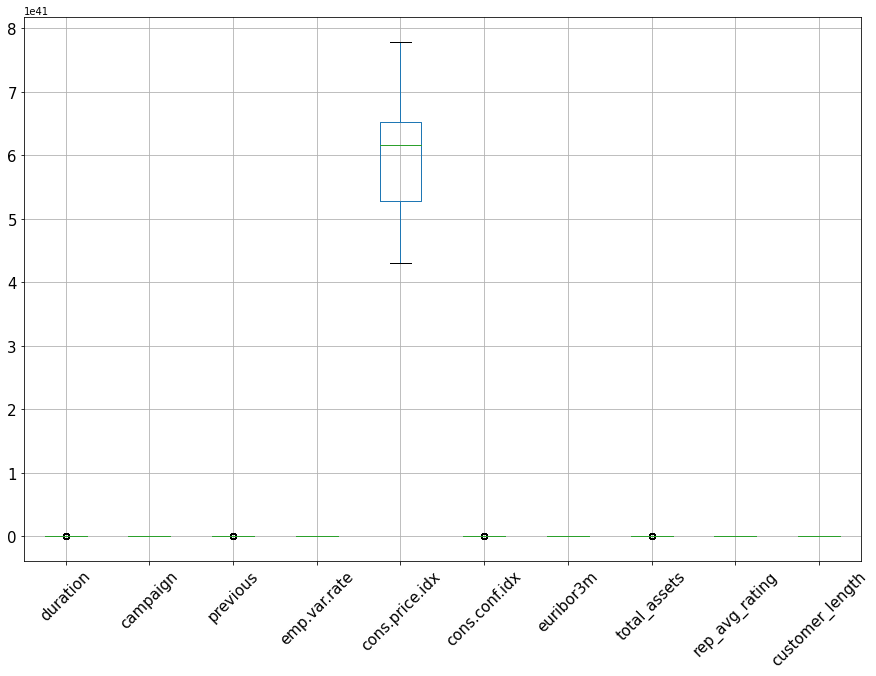

In [ ]:
bxplt_pre = X_train_con_pt.boxplot(rot=45, fontsize=15, figsize = (15,10))

In [ ]:
X_train_con_outlier = iqrdf(X_train_con_pt)

# for columns function, do .apply
# not preferred way, best practice is apply

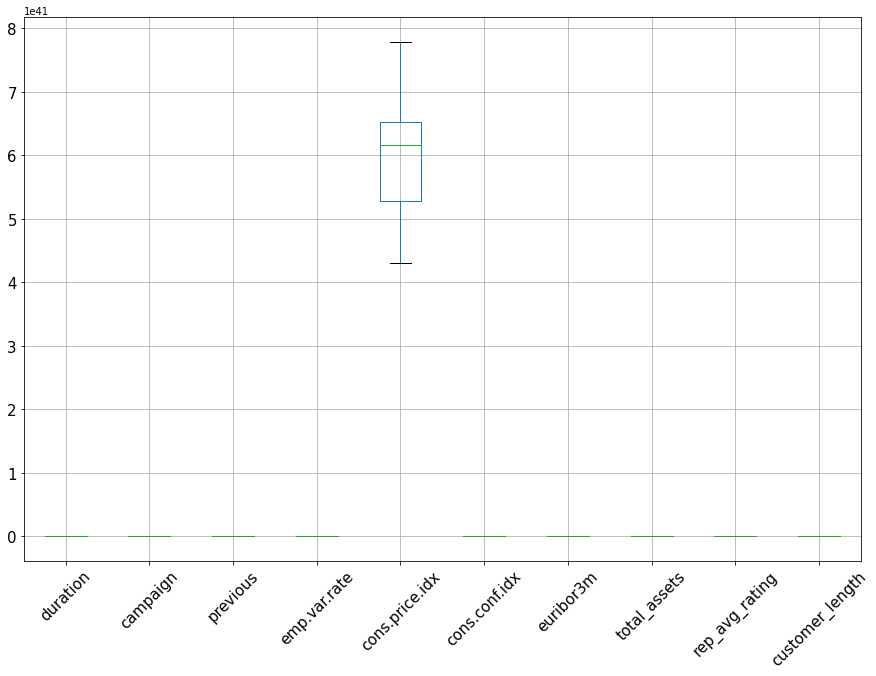

In [ ]:
bxplt_outlier = X_train_con_outlier.boxplot(rot=45, fontsize=15, figsize = (15,10))

In [ ]:
X_train_con_std = standard(X_train_con_pt)

In [ ]:
X_train_con_std.head()

,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,total_assets,rep_avg_rating,customer_length
0,-0.706172,0.845965,-0.0,0.938449,0.552163,-0.431850,0.788671,0.287026,0.804549,0.800043
1,-2.379471,1.418478,-0.0,-1.265860,0.237633,-1.307479,-1.424665,1.698564,-0.838820,-0.765447
2,-1.000156,-1.075756,-0.0,0.938449,-0.301263,1.008138,0.790537,-1.648009,1.577329,1.453547
3,-0.728110,-1.075756,-0.0,0.548713,0.697456,0.948595,0.694529,-0.536231,-0.802338,-0.721795
4,0.688500,0.234435,-0.0,0.938449,0.552163,-0.431850,0.788671,-1.113628,-0.948651,-0.880401


In [ ]:
X_train_con_minmax = minmax(X_train_con_std)

In [ ]:
X_train_con_final = X_train_con_minmax

In [ ]:
X_train_con_final.describe().T
#also do assert or boxplot

,count,mean,std,min,25%,50%,75%,max
duration,33980.0,0.500555,0.198556,0.0,0.375000,0.494041,0.625000,1.0
campaign,33980.0,0.321052,0.298447,0.0,0.000000,0.391017,0.573524,1.0
previous,33980.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
emp.var.rate,33980.0,0.637411,0.386376,0.0,0.148320,0.849418,1.000000,1.0
cons.price.idx,33980.0,0.481755,0.223302,0.0,0.279312,0.534818,0.637496,1.0
cons.conf.idx,33980.0,0.493625,0.197254,0.0,0.408442,0.450362,0.680736,1.0
euribor3m,33980.0,0.644926,0.409224,0.0,0.072515,0.928393,0.967665,1.0
total_assets,33980.0,0.499656,0.186905,0.0,0.375000,0.500040,0.625000,1.0
rep_avg_rating,33980.0,0.512896,0.283100,0.0,0.275429,0.518690,0.753511,1.0
customer_length,33980.0,0.567329,0.274750,0.0,0.349069,0.592544,0.804915,1.0


In [ ]:
X_train_con_final.drop(['previous'],axis=1,inplace=True)

In [ ]:
X_train_con_final.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,33980.0,0.500555,0.198556,0.0,0.375000,0.494041,0.625000,1.0
campaign,33980.0,0.321052,0.298447,0.0,0.000000,0.391017,0.573524,1.0
emp.var.rate,33980.0,0.637411,0.386376,0.0,0.148320,0.849418,1.000000,1.0
cons.price.idx,33980.0,0.481755,0.223302,0.0,0.279312,0.534818,0.637496,1.0
cons.conf.idx,33980.0,0.493625,0.197254,0.0,0.408442,0.450362,0.680736,1.0
euribor3m,33980.0,0.644926,0.409224,0.0,0.072515,0.928393,0.967665,1.0
total_assets,33980.0,0.499656,0.186905,0.0,0.375000,0.500040,0.625000,1.0
rep_avg_rating,33980.0,0.512896,0.283100,0.0,0.275429,0.518690,0.753511,1.0
customer_length,33980.0,0.567329,0.274750,0.0,0.349069,0.592544,0.804915,1.0


####Applying the functions above to **X_test_con**

In [ ]:
X_test_con.drop(['pdays','pdays_bin','nr.employed'],axis=1,inplace=True)

In [ ]:
X_test_con.skew()

duration           3.661421
campaign           4.724771
previous           3.730127
emp.var.rate      -0.749521
cons.price.idx    -0.211372
cons.conf.idx      0.319609
euribor3m         -0.761863
total_assets       1.299796
rep_avg_rating     0.003803
customer_length    0.000355
dtype: float64

In [ ]:
X_test_con_pt = pt_yeo(X_test_con)

In [ ]:
X_test_con_pt.skew()

duration           0.020755
campaign           0.239839
previous           2.077166
emp.var.rate      -0.428438
cons.price.idx    -0.031759
cons.conf.idx      0.044327
euribor3m         -0.694744
total_assets      -0.000024
rep_avg_rating    -0.054389
customer_length   -0.250489
dtype: float64

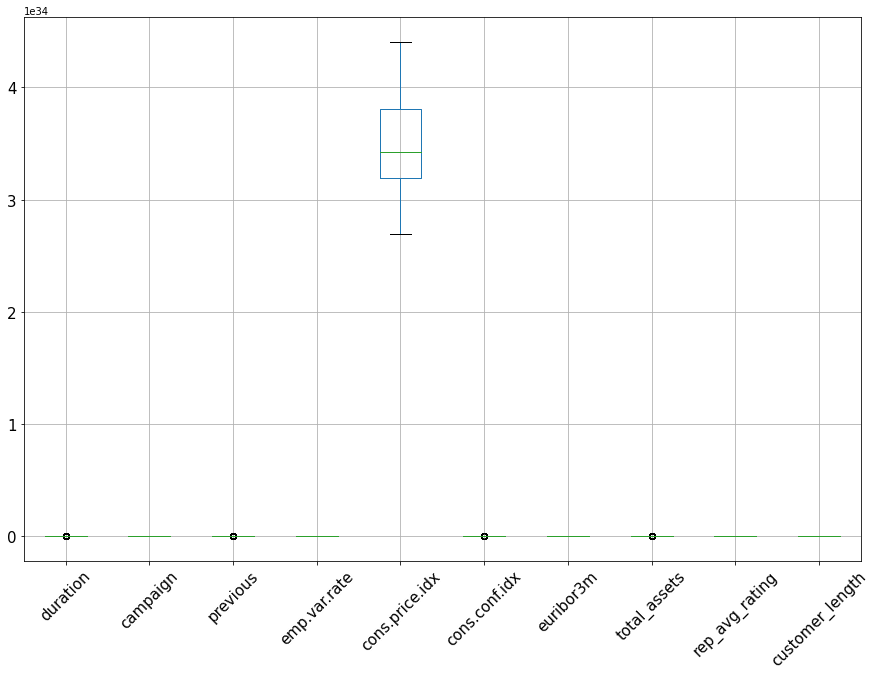

In [ ]:
bxplt_pre_2 = X_test_con_pt.boxplot(rot=45, fontsize=15, figsize = (15,10))

In [ ]:
X_test_con_outlier = iqrdf(X_test_con_pt)

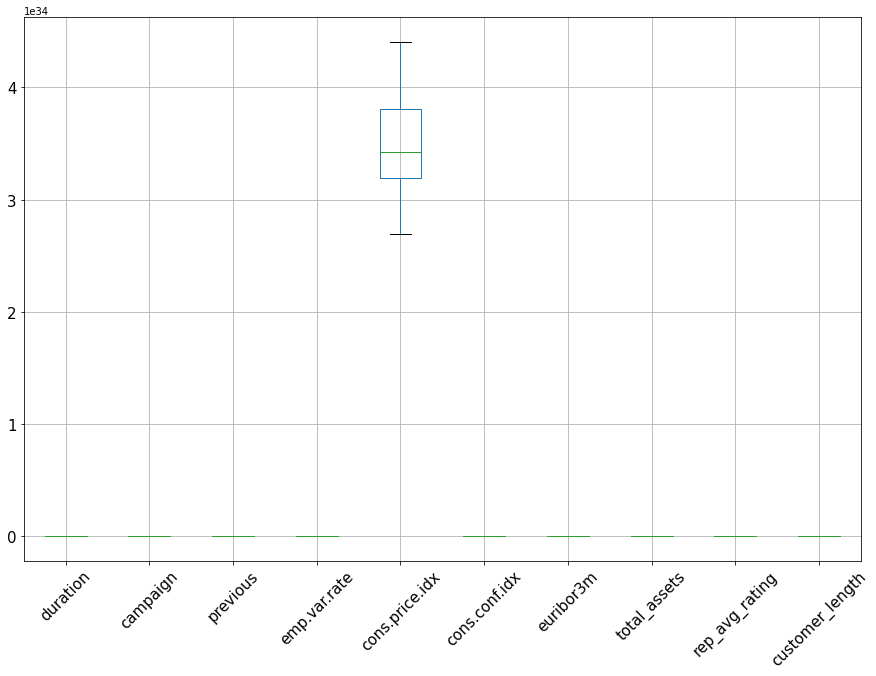

In [ ]:
bxplt_outlier_2 = X_test_con_outlier.boxplot(rot=45, fontsize=15, figsize = (15,10))

In [ ]:
X_test_con_std = standard(X_test_con_pt)

In [ ]:
X_test_con_std.head()

,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,total_assets,rep_avg_rating,customer_length
0,-0.310287,-1.083835,-0.0,0.943185,-0.268779,0.994466,0.792978,-0.671811,-0.070245,-0.001346
1,0.408097,0.246920,0.0,-1.262798,-0.881646,-1.527731,-1.387648,-0.282305,1.319816,1.235035
2,-0.098440,-1.083835,-0.0,0.943185,0.581071,-0.435298,0.792978,0.240634,0.680394,0.682908
3,-1.562109,-1.083835,-0.0,-0.560941,-0.678620,-0.271806,0.135414,1.220942,-1.282240,-1.266190
4,-0.716117,0.865627,-0.0,0.943185,0.581071,-0.225612,0.792056,-1.675383,-1.728835,-1.879149


In [ ]:
X_test_con_minmax = minmax(X_test_con_std)

In [ ]:
X_test_con_final = X_test_con_minmax

In [ ]:
X_test_con_final.head()

,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,total_assets,rep_avg_rating,customer_length
0,0.438983,0.000000,0.0,1.000000,0.426750,0.688095,0.968772,0.373313,0.492516,0.565686
1,0.581245,0.396426,0.0,0.149486,0.289825,0.190106,0.075470,0.446175,0.881017,0.902103
2,0.480935,0.000000,0.0,1.000000,0.616621,0.405799,0.968772,0.543997,0.702308,0.751870
3,0.191083,0.000000,0.0,0.420087,0.335185,0.438079,0.699399,0.727375,0.153783,0.221523
4,0.358616,0.580737,0.0,1.000000,0.616621,0.447200,0.968394,0.185583,0.028967,0.054738


In [ ]:
X_test_con_final.drop(['previous'],axis=1,inplace=True)

In [ ]:
X_test_con_final.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,11327.0,0.500429,0.198040,0.0,0.375000,0.493506,0.625000,1.0
campaign,11327.0,0.322870,0.297909,0.0,0.000000,0.396426,0.580737,1.0
emp.var.rate,11327.0,0.636356,0.385566,0.0,0.149486,0.850238,1.000000,1.0
cons.price.idx,11327.0,0.486800,0.223427,0.0,0.289825,0.426750,0.648605,1.0
cons.conf.idx,11327.0,0.491745,0.197452,0.0,0.405799,0.447200,0.676331,1.0
euribor3m,11327.0,0.643926,0.409672,0.0,0.074089,0.929154,0.968017,1.0
total_assets,11327.0,0.498983,0.187070,0.0,0.375000,0.499080,0.625000,1.0
rep_avg_rating,11327.0,0.512149,0.279497,0.0,0.286103,0.519096,0.747384,1.0
customer_length,11327.0,0.566052,0.272111,0.0,0.354470,0.589395,0.800282,1.0


## Merge Dataframes 

Merge OHE dataframes with continous dataframes

In [ ]:
X_test_con_final.head()

,duration,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,total_assets,rep_avg_rating,customer_length
0,0.438983,0.000000,1.000000,0.426750,0.688095,0.968772,0.373313,0.492516,0.565686
1,0.581245,0.396426,0.149486,0.289825,0.190106,0.075470,0.446175,0.881017,0.902103
2,0.480935,0.000000,1.000000,0.616621,0.405799,0.968772,0.543997,0.702308,0.751870
3,0.191083,0.000000,0.420087,0.335185,0.438079,0.699399,0.727375,0.153783,0.221523
4,0.358616,0.580737,1.000000,0.616621,0.447200,0.968394,0.185583,0.028967,0.054738


In [ ]:
X_train_con_final.reset_index(drop=True, inplace=True)
X_train_cat.reset_index(drop=True, inplace=True)

X_train_complete = pd.concat([X_train_con_final, X_train_cat],axis =1)
X_train_complete.isna().values.any()

False

In [ ]:
X_test_con_final.reset_index(drop=True, inplace=True)
X_test_cat.reset_index(drop=True, inplace=True)

X_test_complete = pd.concat([X_test_con_final, X_test_cat],axis =1)
X_test_complete.isna().values.any()

False

In [ ]:
X_train_complete.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)

X_train_complete = X_train_complete.join(y_train)
X_train_complete.shape

(33980, 59)

In [ ]:
X_train_complete.isna().values.any()

False

In [ ]:
X_train_complete.drop(['y','duration'], axis=1, inplace=True)
X_train_complete.rename(columns={'y_bin':'y'}, inplace=True)

X_train_complete.head(2)

,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,total_assets,rep_avg_rating,customer_length,customer_ratings,cust_exp_ind,...,job_bin_other,job_bin_services,job_bin_unknown,job_bin_white-collar,age_bin_25 or younger,age_bin_26 to 35,age_bin_36 to 45,age_bin_46 to 55,age_bin_56+,y
0,0.573524,1.00000,0.605052,0.408442,0.967665,0.553302,0.740661,0.787138,5.0,1,...,0,0,0,0,0,0,1,0,0,0
1,0.744386,0.14832,0.534818,0.235723,0.061928,0.817121,0.275429,0.357026,3.0,1,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
X_test_complete.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

X_test_complete = X_test_complete.join(y_test)
X_test_complete.shape

(11327, 59)

In [ ]:
X_test_complete.isna().values.any()

False

In [ ]:
X_test_complete.drop(['y','duration'], axis=1, inplace=True)
X_test_complete.rename(columns={'y_bin':'y'}, inplace=True)

X_test_complete.head(2)

,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,total_assets,rep_avg_rating,customer_length,customer_ratings,cust_exp_ind,...,job_bin_other,job_bin_services,job_bin_unknown,job_bin_white-collar,age_bin_25 or younger,age_bin_26 to 35,age_bin_36 to 45,age_bin_46 to 55,age_bin_56+,y
0,0.000000,1.000000,0.426750,0.688095,0.968772,0.373313,0.492516,0.565686,4.0,1,...,0,0,0,0,0,1,0,0,0,0
1,0.396426,0.149486,0.289825,0.190106,0.075470,0.446175,0.881017,0.902103,5.0,1,...,0,0,0,0,0,0,1,0,0,1


In [ ]:
X_test_complete.isna().values.any()

False

## EDA Post Outlier Handling 

### Box Plots for Continous Data

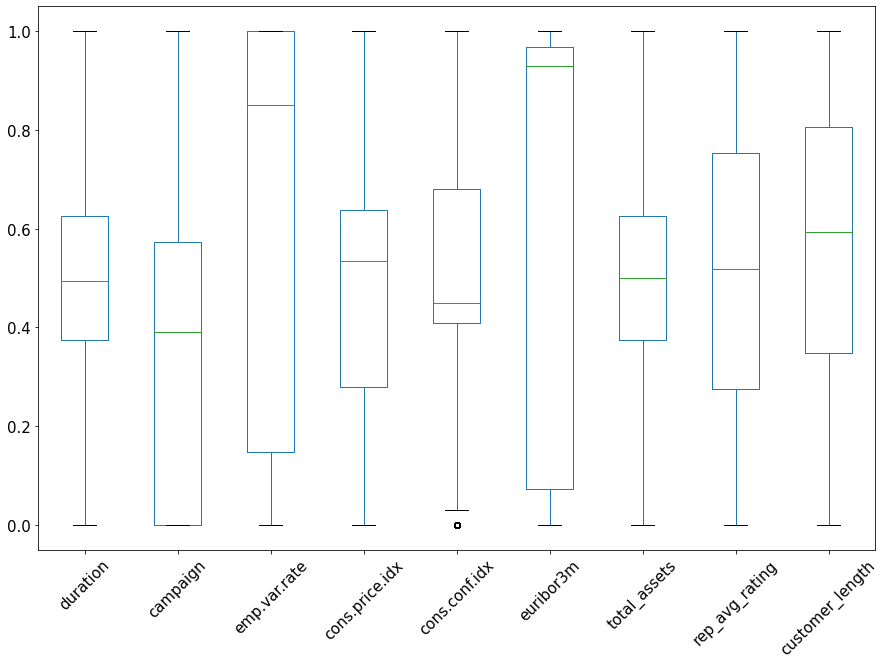

In [ ]:
boxplot_complete = X_train_con_final.boxplot(grid=False, rot=45, fontsize=15, figsize = (15,10))


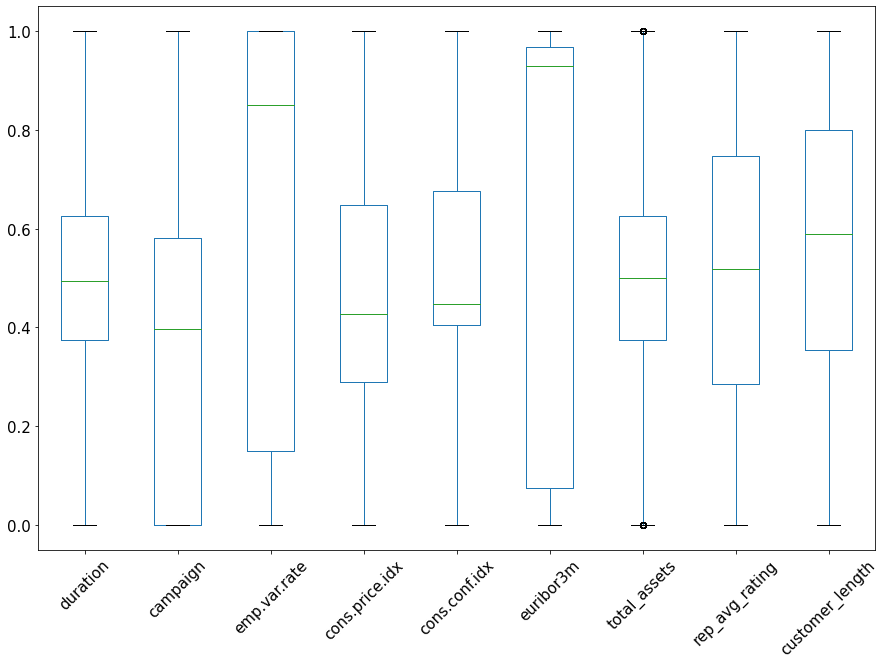

In [ ]:
boxplot_complete = X_test_con_final.boxplot(grid=False, rot=45, fontsize=15, figsize = (15,10))

## Export Data

In [ ]:
#path = '/content/drive/MyDrive/Classroom/DATA 6545: Machine Learning for Predictive Analysis SP2022/Final Project/X_test.csv'
#X_test_complete.to_csv(path,index=False)

#path = '/content/drive/MyDrive/Classroom/DATA 6545: Machine Learning for Predictive Analysis SP2022/Final Project/X_train.csv'
#X_train_complete.to_csv(path,index=False)

#path = '/content/drive/MyDrive/Classroom/DATA 6545: Machine Learning for Predictive Analysis SP2022/Final Project/y_test.csv'
#y_test.to_csv(path,index=False)

#path = '/content/drive/MyDrive/Classroom/DATA 6545: Machine Learning for Predictive Analysis SP2022/Final Project/y_train.csv'
#y_train.to_csv(path,index=False)